In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

pacific grove us
ushuaia ar
taltal cl
bluff nz
dikson ru
rio grande br
lensk ru
east london za
cidreira br
rikitea pf
punta arenas cl
jamestown sh
maraba br
aklavik ca
saravena co
ushuaia ar
hilo us
yellowknife ca
punta arenas cl
hilo us
lompoc us
reutlingen de
bethel us
busselton au
yellowknife ca
castro cl
yulara au
hermanus za
northam au
hobart au
albany au
la ronge ca
ayagoz kz
hobart au
qaanaaq gl
rikitea pf
kodiak us
lompoc us
mataura pf
castro cl
gigmoto ph
brigantine us
cape town za
luderitz na
albany au
cabinda ao
atuona pf
attawapiskat ca
lebu cl
severo-kurilsk ru
yellowknife ca
namatanai pg
ushuaia ar
georgiyevka kz
hermanus za
paris us
tuktoyaktuk ca
punta arenas cl
rikitea pf
jamestown sh
saint anthony ca
hilo us
albany au
souillac mu
salalah om
dikson ru
taoudenni ml
butaritari ki
half moon bay us
waipawa nz
coahuayana mx
beeville us
hithadhoo mv
esperance au
arraial do cabo br
vaini to
leningradskiy ru
dubenskiy ru
whitianga nz
baghdad iq
mitu co
kodiak us
albany au
sain

cape town za
port augusta au
tasiilaq gl
illoqqortoormiut gl
barrow us
albany au
carnarvon au
khatanga ru
saskylakh ru
kropotkin ru
macheng cn
busselton au
kapaa us
saint-georges gf
puerto ayora ec
thompson ca
augusto correa br
port lincoln au
brumado br
mataura pf
geraldton au
ancud cl
mahebourg mu
vaini to
bambous virieux mu
hermanus za
bathsheba bb
klaksvik fo
clyde river ca
saint-philippe re
mizque bo
lavrentiya ru
hithadhoo mv
san patricio mx
taolanaro mg
avarua ck
kununurra au
puerto ayora ec
ushuaia ar
bucyrus us
kapaa us
heihe cn
atuona pf
kamaishi jp
dikson ru
antofagasta cl
port elizabeth za
bambous virieux mu
bredasdorp za
rikitea pf
nisia floresta br
arraial do cabo br
iracoubo gf
mataura pf
kaitangata nz
qaanaaq gl
cape town za
hobart au
qaanaaq gl
beyneu kz
esperance au
tatishchevo ru
port macquarie au
naron es
sakakah sa
rikitea pf
vestmannaeyjar is
rikitea pf
chuy uy
port elizabeth za
hobart au
aklavik ca
bethel us
karamay cn
longyearbyen sj
tuktoyaktuk ca
itoman jp
zho

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [9]:
import requests
requests.__version__

'2.25.1'

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | taltal
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | lensk
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | maraba
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | saravena
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | reutlingen
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | yulara
Processing R

Processing Record 34 of Set 4 | biltine
Processing Record 35 of Set 4 | marystown
Processing Record 36 of Set 4 | shizunai
Processing Record 37 of Set 4 | jiroft
City not found. Skipping...
Processing Record 38 of Set 4 | flic en flac
Processing Record 39 of Set 4 | dambulla
Processing Record 40 of Set 4 | angra
City not found. Skipping...
Processing Record 41 of Set 4 | comodoro rivadavia
Processing Record 42 of Set 4 | camacupa
Processing Record 43 of Set 4 | coronel vivida
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | burica
City not found. Skipping...
Processing Record 46 of Set 4 | salina
Processing Record 47 of Set 4 | halifax
Processing Record 48 of Set 4 | muros
Processing Record 49 of Set 4 | wageningen
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | sarti
Processing Record 2 of Set 5 | rock sound
Processing Record 3 of Set 5 | quang ngai
Processing Record 4 of Set 5 | road town
Processing Record 5 of Set 5 | price
Processin

Processing Record 26 of Set 8 | gashua
Processing Record 27 of Set 8 | truth or consequences
Processing Record 28 of Set 8 | freeport
Processing Record 29 of Set 8 | flin flon
Processing Record 30 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 31 of Set 8 | westpunt
City not found. Skipping...
Processing Record 32 of Set 8 | mahibadhoo
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | yaan
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | gisborne
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | le port
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | ca mau
Processing Record 41 of Set 8 | leshukonskoye
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | puerto escondido
Processing Record 44 of Set 8 | nanakuli
Processing Record 45 of Set 8 | inhambane
Processing Record 46 of Set 8 | naila
Processing Record 47 of Set 8 | port augusta
Processing Record 48 of 

Processing Record 10 of Set 12 | barbar
City not found. Skipping...
Processing Record 11 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 12 of Set 12 | alappuzha
Processing Record 13 of Set 12 | imbituba
Processing Record 14 of Set 12 | kjollefjord
Processing Record 15 of Set 12 | tilichiki
Processing Record 16 of Set 12 | shingu
Processing Record 17 of Set 12 | vanavara
Processing Record 18 of Set 12 | san-pedro
Processing Record 19 of Set 12 | acajutla
Processing Record 20 of Set 12 | narsaq
Processing Record 21 of Set 12 | gorontalo
Processing Record 22 of Set 12 | tuatapere
Processing Record 23 of Set 12 | patea
Processing Record 24 of Set 12 | port blair
Processing Record 25 of Set 12 | seoul
Processing Record 26 of Set 12 | kristiinankaupunki
Processing Record 27 of Set 12 | dubbo
Processing Record 28 of Set 12 | malkangiri
Processing Record 29 of Set 12 | tynda
Processing Record 30 of Set 12 | zlobin
Processing Record 31 of Set 12 | dong hoi
Processing Recor

In [13]:
len(city_data)

544

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacific Grove,36.6177,-121.9166,84.15,84,40,5.01,US,2021-07-21 18:23:30
1,Ushuaia,-54.8000,-68.3000,35.22,75,20,4.61,AR,2021-07-21 18:24:50
2,Taltal,-25.4000,-70.4833,63.25,61,20,4.32,CL,2021-07-21 18:24:51
3,Bluff,-46.6000,168.3333,45.81,73,100,13.31,NZ,2021-07-21 18:24:51
4,Dikson,73.5069,80.5464,52.86,62,85,17.90,RU,2021-07-21 18:24:51
5,Rio Grande,-32.0350,-52.0986,66.31,47,2,6.02,BR,2021-07-21 18:23:22
6,Lensk,60.7253,114.9278,59.49,75,85,2.48,RU,2021-07-21 18:24:52
7,East London,-33.0153,27.9116,59.94,21,0,9.22,ZA,2021-07-21 18:24:52
8,Cidreira,-30.1811,-50.2056,63.12,46,1,6.93,BR,2021-07-21 18:24:53
9,Rikitea,-23.1203,-134.9692,72.18,65,61,20.58,PF,2021-07-21 18:24:53


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2021-07-21 18:23:30,36.6177,-121.9166,84.15,84,40,5.01
1,Ushuaia,AR,2021-07-21 18:24:50,-54.8000,-68.3000,35.22,75,20,4.61
2,Taltal,CL,2021-07-21 18:24:51,-25.4000,-70.4833,63.25,61,20,4.32
3,Bluff,NZ,2021-07-21 18:24:51,-46.6000,168.3333,45.81,73,100,13.31
4,Dikson,RU,2021-07-21 18:24:51,73.5069,80.5464,52.86,62,85,17.90
5,Rio Grande,BR,2021-07-21 18:23:22,-32.0350,-52.0986,66.31,47,2,6.02
6,Lensk,RU,2021-07-21 18:24:52,60.7253,114.9278,59.49,75,85,2.48
7,East London,ZA,2021-07-21 18:24:52,-33.0153,27.9116,59.94,21,0,9.22
8,Cidreira,BR,2021-07-21 18:24:53,-30.1811,-50.2056,63.12,46,1,6.93
9,Rikitea,PF,2021-07-21 18:24:53,-23.1203,-134.9692,72.18,65,61,20.58


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

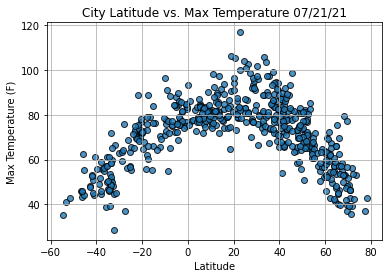

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

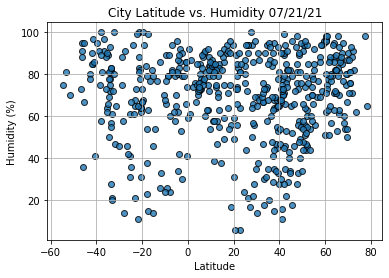

In [19]:
# Build the scatter plot for  vs. max temperature.
plt.scatter(lats,
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

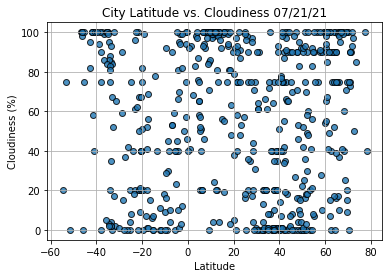

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

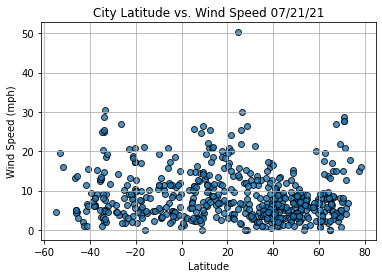

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()